In [16]:
#Statistics learning
# Importing datasets
import statsmodels.datasets as dt

# For Linear model
import statsmodels.api as sm

# Cross Validation and Hyperparameter Tuning
from statsmodels.sandbox.tools import cross_val
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model

# For Standardization
from scipy.stats.mstats import zscore

# For kewl vizzz
import seaborn as sns
import matplotlib.pyplot as plt

# For data manipulations
import numpy as np
import pandas as pd
import random
import datetime as dm
%matplotlib inline

In [17]:
#Importing HR Analytics dataset
pay_equity = pd.read_csv('C:/Users/JAINMOD/Desktop/Respiratory/Python Learning/data.csv')
pay_equity.head()

,Emp_ID,Division,Site,Family,Band,Gender,DOJ,Comp
0,1,PHARMA,CADO,Sales,4,Male,10/24/2016,92679.36127
1,2,PHARMA,CADO,Sales,3,Male,9/9/2002,149186.59570
2,3,PHARMA,CADO,Sales,4,Male,10/9/2007,145547.56730
3,4,PHARMA,CADO,Sales,6,Female,1/6/1997,113265.97200
4,5,PHARMA,CADO,Sales,4,Male,3/5/2001,142829.44750


Pay Equity Model 2017

In [18]:
#Selecting random locations to create training and test datasets
pay_equity_model = pay_equity.copy()
pay_equity_model['is_train']=np.random.uniform(0,1, len(pay_equity_model))<= .8
pay_equity_model


,Emp_ID,Division,Site,Family,Band,Gender,DOJ,Comp,is_train
0,1,PHARMA,CADO,Sales,4,Male,10/24/2016,92679.36127,False
1,2,PHARMA,CADO,Sales,3,Male,9/9/2002,149186.59570,True
2,3,PHARMA,CADO,Sales,4,Male,10/9/2007,145547.56730,True
3,4,PHARMA,CADO,Sales,6,Female,1/6/1997,113265.97200,True
4,5,PHARMA,CADO,Sales,4,Male,3/5/2001,142829.44750,True
5,6,PHARMA,CADO,Sales,4,Female,12/15/2008,146712.78210,False
6,7,PHARMA,CADO,Sales,4,Male,11/26/2001,147855.97120,True
7,8,SANDOZ,CABV,Sales,3,Male,4/14/2008,161103.65090,True
8,9,ONCOLOGY,CADO,Sales,5,Female,9/2/2002,105427.81690,True
9,10,SANDOZ,CABV,Sales,3,Male,9/28/2009,199508.53890,True


In [19]:
# Dividing data based on training & test
pe_train = pay_equity_model.loc[pay_equity_model['is_train']==True,:]
pe_test = pay_equity_model.loc[pay_equity_model['is_train']==False,:]
del pay_equity_model['is_train']
del pe_train['is_train']
del pe_test['is_train']
pe_train
pe_test

,Emp_ID,Division,Site,Family,Band,Gender,DOJ,Comp
0,1,PHARMA,CADO,Sales,4,Male,10/24/2016,92679.36127
5,6,PHARMA,CADO,Sales,4,Female,12/15/2008,146712.78210
16,17,ALCON,CAMI,Sales,3,Male,3/5/2001,188132.37870
22,23,ALCON,CAMI,Sales,6,Male,3/21/2011,107804.18320
24,25,SANDOZ,CABV,Sales,4,Male,1/3/2000,125948.43690
26,27,PHARMA,CADO,Sales,4,Male,1/12/2001,134190.45580
40,41,SANDOZ,CABV,Sales,5,Male,11/2/2005,95698.59810
47,48,SANDOZ,CABV,Sales,5,Male,4/10/2007,89671.17475
52,53,SANDOZ,CABV,Sales,5,Male,9/5/2006,100084.38410
53,54,SANDOZ,CABV,Sales,5,Male,9/15/2008,119759.51720


In [20]:
print(pay_equity_model)
print(pe_train)
print(pe_test)

     Emp_ID  Division  Site Family  Band  Gender         DOJ          Comp
0         1    PHARMA  CADO  Sales     4    Male  10/24/2016   92679.36127
1         2    PHARMA  CADO  Sales     3    Male    9/9/2002  149186.59570
2         3    PHARMA  CADO  Sales     4    Male   10/9/2007  145547.56730
3         4    PHARMA  CADO  Sales     6  Female    1/6/1997  113265.97200
4         5    PHARMA  CADO  Sales     4    Male    3/5/2001  142829.44750
5         6    PHARMA  CADO  Sales     4  Female  12/15/2008  146712.78210
6         7    PHARMA  CADO  Sales     4    Male  11/26/2001  147855.97120
7         8    SANDOZ  CABV  Sales     3    Male   4/14/2008  161103.65090
8         9  ONCOLOGY  CADO  Sales     5  Female    9/2/2002  105427.81690
9        10    SANDOZ  CABV  Sales     3    Male   9/28/2009  199508.53890
10       11    PHARMA  CADO  Sales     4    Male   2/17/1997  138643.79640
11       12    SANDOZ  CABV  Sales     4    Male   4/28/1997  122071.14480
12       13    SANDOZ  CA

In [21]:
pay_equity_model.info()
pe_train.info()
pe_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 8 columns):
Emp_ID      448 non-null int64
Division    448 non-null object
Site        448 non-null object
Family      448 non-null object
Band        448 non-null int64
Gender      448 non-null object
DOJ         448 non-null object
Comp        448 non-null float64
dtypes: float64(1), int64(2), object(5)
memory usage: 19.3+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 349 entries, 1 to 446
Data columns (total 8 columns):
Emp_ID      349 non-null int64
Division    349 non-null object
Site        349 non-null object
Family      349 non-null object
Band        349 non-null int64
Gender      349 non-null object
DOJ         349 non-null object
Comp        349 non-null float64
dtypes: float64(1), int64(2), object(5)
memory usage: 17.7+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 447
Data columns (total 8 columns):
Emp_ID      99 non-null int64
Division    99 non-null

In [22]:
pay_equity_model.describe()

,Emp_ID,Band,Comp
count,448.000000,448.000000,448.000000
mean,224.500000,5.665179,98695.343824
std,129.470717,0.845804,28632.846447
min,1.000000,1.000000,36564.510080
25%,112.750000,5.000000,84485.103828
50%,224.500000,6.000000,96662.294775
75%,336.250000,6.000000,112340.407850
max,448.000000,7.000000,244075.326500


In [23]:
#Creating dummy variables for the categorical variables
pay_equity_model1 = pay_equity_model.copy()
pay_equity_model1['Male'] = np.where(pay_equity_model1['Gender'] == "Male",1,0)
pay_equity_model1['today'] = pd.to_datetime(dm.date.today())
pay_equity_model1['Tenure'] = pay_equity_model1['today'] - pd.to_datetime(pay_equity_model1['DOJ'])
pay_equity_model1['Tenure_yr'] = (pay_equity_model1['Tenure'])/np.timedelta64(365, 'D')
#pay_equity_model1.drop(pay_equity_model1['Tenure'], axis = 1)
pay_equity_model1

,Emp_ID,Division,Site,Family,Band,Gender,DOJ,Comp,Male,today,Tenure,Tenure_yr
0,1,PHARMA,CADO,Sales,4,Male,10/24/2016,92679.36127,1,2017-08-09,289 days,0.791781
1,2,PHARMA,CADO,Sales,3,Male,9/9/2002,149186.59570,1,2017-08-09,5448 days,14.926027
2,3,PHARMA,CADO,Sales,4,Male,10/9/2007,145547.56730,1,2017-08-09,3592 days,9.841096
3,4,PHARMA,CADO,Sales,6,Female,1/6/1997,113265.97200,0,2017-08-09,7520 days,20.602740
4,5,PHARMA,CADO,Sales,4,Male,3/5/2001,142829.44750,1,2017-08-09,6001 days,16.441096
5,6,PHARMA,CADO,Sales,4,Female,12/15/2008,146712.78210,0,2017-08-09,3159 days,8.654795
6,7,PHARMA,CADO,Sales,4,Male,11/26/2001,147855.97120,1,2017-08-09,5735 days,15.712329
7,8,SANDOZ,CABV,Sales,3,Male,4/14/2008,161103.65090,1,2017-08-09,3404 days,9.326027
8,9,ONCOLOGY,CADO,Sales,5,Female,9/2/2002,105427.81690,0,2017-08-09,5455 days,14.945205
9,10,SANDOZ,CABV,Sales,3,Male,9/28/2009,199508.53890,1,2017-08-09,2872 days,7.868493


In [24]:
#Creating dummy variables for the categorical variables
pay_equity_model2 = pay_equity_model1.drop(['today','Male','Tenure'], axis =1)
pay_equity_model3 = pd.concat([pay_equity_model2,pd.get_dummies(pay_equity_model2['Division']),pd.get_dummies(pay_equity_model2['Site']),
                              pd.get_dummies(pay_equity_model2['Gender']),pd.get_dummies(pay_equity_model2['Band'], prefix = 'Band')],axis =1)
pay_equity4 = pay_equity_model3.drop(['Division','Gender','Site','Band'], axis =1)
pay_equity4

,Emp_ID,Family,DOJ,Comp,Tenure_yr,ALCON,ONCOLOGY,PHARMA,SANDOZ,CABV,CADO,CAMI,Female,Male,Band_1,Band_3,Band_4,Band_5,Band_6,Band_7
0,1,Sales,10/24/2016,92679.36127,0.791781,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0
1,2,Sales,9/9/2002,149186.59570,14.926027,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0
2,3,Sales,10/9/2007,145547.56730,9.841096,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0
3,4,Sales,1/6/1997,113265.97200,20.602740,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0
4,5,Sales,3/5/2001,142829.44750,16.441096,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0
5,6,Sales,12/15/2008,146712.78210,8.654795,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0
6,7,Sales,11/26/2001,147855.97120,15.712329,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0
7,8,Sales,4/14/2008,161103.65090,9.326027,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0
8,9,Sales,9/2/2002,105427.81690,14.945205,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0
9,10,Sales,9/28/2009,199508.53890,7.868493,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0


In [25]:
#Outlier Treatment
pay_equity5 = pay_equity4[pay_equity4['Comp'] > pay_equity4['Comp'].quantile(0.99)] & pay_equity4[pay_equity4['Comp'] < pay_equity4['Comp'].quantile(0.01)]

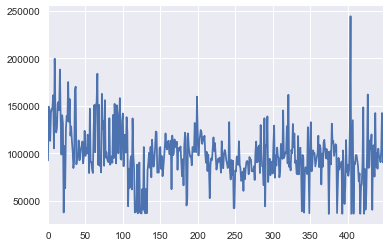

In [26]:
#P = np.percentile(pay_equity4.Comp, [1, 99])
#Model_pay = pay_equity4[(pay_equity4.Comp > P[0]) & (pay_equity4.Comp < P[1])]
#Model_pay
p = pay_equity4['Comp'].quantile([0.01,0.99])
p
pay_equity4.Comp.plot()

In [27]:
#Replacing outliers from the mean(capping)
pay_equity4['New_Comp_h']= np.where(pay_equity4['Comp'] > p[0.99], p[0.99],pay_equity4['Comp'])
pay_equity4['New_Comp']= np.where(pay_equity4['New_Comp_h'] < p[0.01], p[0.01],pay_equity4['New_Comp_h'])
pay_equity5 = pay_equity4.drop(['Emp_ID','Family','Comp','New_Comp_h','DOJ'], axis =1)
pay_equity5

,Tenure_yr,ALCON,ONCOLOGY,PHARMA,SANDOZ,CABV,CADO,CAMI,Female,Male,Band_1,Band_3,Band_4,Band_5,Band_6,Band_7,New_Comp
0,0.791781,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,92679.361270
1,14.926027,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,149186.595700
2,9.841096,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,145547.567300
3,20.602740,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,113265.972000
4,16.441096,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,142829.447500
5,8.654795,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,146712.782100
6,15.712329,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,147855.971200
7,9.326027,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,161103.650900
8,14.945205,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,105427.816900
9,7.868493,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,172724.217462


In [28]:
#check
p = pay_equity5['New_Comp'].quantile([0.01,0.99])
p

0.01     36761.928312
0.99    171527.310545
Name: New_Comp, dtype: float64

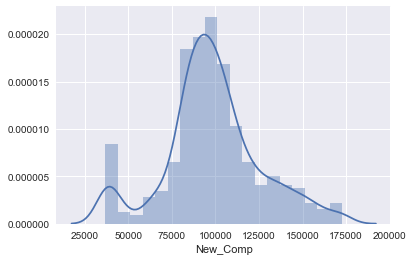

In [29]:
#pay_equity5.New_Comp.plot()
sns.distplot(pay_equity5['New_Comp'])
#sns.distplot(pay_equity4['Comp'])

In [30]:
#Sales data linear model
sales_data = pay_equity5.copy()
sales_data.head()

,Tenure_yr,ALCON,ONCOLOGY,PHARMA,SANDOZ,CABV,CADO,CAMI,Female,Male,Band_1,Band_3,Band_4,Band_5,Band_6,Band_7,New_Comp
0,0.791781,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,92679.36127
1,14.926027,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,149186.59570
2,9.841096,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,145547.56730
3,20.602740,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,113265.97200
4,16.441096,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,142829.44750


In [31]:
# Dividing data based on training & test
sales_data['is_train']=np.random.uniform(0,1, len(sales_data))<= .8
train = sales_data.loc[sales_data['is_train']==True,:]
test = sales_data.loc[sales_data['is_train']==False,:]
del sales_data['is_train']
del train['is_train']
del test['is_train']
print(sales_data.shape)
print(train.shape)
print(test.shape)

(448, 17)
(360, 17)
(88, 17)


In [32]:
sales_model = sm.OLS(train.loc[:, 'New_Comp'], train.drop(['New_Comp','Band_5'], axis=1, inplace=False)).fit()
sales_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               New_Comp   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     65.14
Date:                Wed, 09 Aug 2017   Prob (F-statistic):           1.15e-73
Time:                        07:50:12   Log-Likelihood:                -3998.3
No. Observations:                 360   AIC:                             8019.
Df Residuals:                     349   BIC:                             8061.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Tenure_yr    755.9119    123.604      6.116      0.000     512.809     999.014
ALCON       3.101e+04   1116.416     27.779      0.000    2.88e+04    3.32e+04
ONCOLOGY    2.323e+04   1826.765     12.714      0.000    1.96e+04    2.68e+04
PHARMA       1.53e+04   1439.653     10.628      0.000    1.25e+04    1.81e+04
SANDOZ      2.276e+04   1242.270     18.321      0.000    2.03e+04    2.52e+04
CABV        2.276e+04   1242.270     18.321      0.000    2.03e+04    2.52e+04
CADO        3.853e+04   1572.916     24.494      0.000    3.54e+04    4.16e+04
CAMI        3.101e+04   1116.416     27.779      0.000    2.88e+04    3.32e+04
Female      4.488e+04   1495.933     30.003      0.000    4.19e+04    4.78e+04
Male        4.742e+04   1449.018     32.724      0.000    4.46e+04    5.03e+04
Band_1      7.892e+04   1.66e+04      4.741      0.000    4.62e+04    1.12e+05
Band_3      5.965e+04   6630.833      8.995      0.000    4.66e+04    7.27e+04
Band_4      2.364e+04   4016.951      5.886      0.000    1.57e+04    3.15e+04
Band_6     -1.257e+04   3032.078     -4.146      0.000   -1.85e+04   -6607.076
Band_7     -6.983e+04   4415.238    -15.816      0.000   -7.85e+04   -6.11e+04
==============================================================================
Omnibus:                       14.262   Durbin-Watson:                   1.784
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               23.475
Skew:                           0.256   Prob(JB):                     7.99e-06
Kurtosis:                       4.142   Cond. No.                     2.60e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.07e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [33]:
#regularization impact check

regularized_model = sm.OLS(train.loc[:, 'New_Comp'], train.drop(['New_Comp','Band_5','CABV','CAMI'], axis=1, inplace=False)).fit_regularized(alpha=0.1)
regularized_model.params
#sales_model1 = sm.OLS(train.loc[:, 'New_Comp'], train.drop(['New_Comp','Band_5','CABV','CAMI'], axis=1, inplace=False)).fit()
#sales_model1.params

Tenure_yr       757.815596
ALCON        108040.902803
ONCOLOGY     107750.619358
PHARMA        99821.055501
SANDOZ        91586.575783
CADO              8.219178
Female        -1218.289076
Male           1318.762737
Band_1        78906.719540
Band_3        59676.562756
Band_4        23713.062127
Band_6       -12489.545060
Band_7       -69754.224193
dtype: float64

In [34]:
#To determine valuse of Alpha to minimize the COST()
tuned_parameters = [{'alpha':[0.1, 0.2, 0.3,0.4, 0.5,0.6, 0.7,0.8, 0.9, 1.0]}]
model = GridSearchCV(linear_model.Ridge(alpha=1.), tuned_parameters, cv=10)
model.fit(sales_data.drop(['New_Comp', 'Band_5','CABV','CAMI'], axis=1, inplace=False), sales_data['New_Comp'])

GridSearchCV(cv=10, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [35]:
sorted(model.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'mean_train_score',
 'param_alpha',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split0_train_score',
 'split1_test_score',
 'split1_train_score',
 'split2_test_score',
 'split2_train_score',
 'split3_test_score',
 'split3_train_score',
 'split4_test_score',
 'split4_train_score',
 'split5_test_score',
 'split5_train_score',
 'split6_test_score',
 'split6_train_score',
 'split7_test_score',
 'split7_train_score',
 'split8_test_score',
 'split8_train_score',
 'split9_test_score',
 'split9_train_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score',
 'std_train_score']

In [36]:
#checking the results
model.cv_results_['mean_train_score']
model.cv_results_['mean_test_score']
#model.cv_results_['std_train_score']
#model.cv_results_['std_test_score']
#model.cv_results_['params']

array([ 0.50059143,  0.50099524,  0.50127665,  0.50145261,  0.5015363 ,
        0.5015383 ,  0.50146737,  0.50133085,  0.50113502,  0.50088531])

In [37]:
#creating dataframe of above 

In [38]:
#Standardizing our data
temp_input = sales_data.drop(['Band_5','CABV','CAMI'], axis=1, inplace=False)
std_input = po.DataFrame(zscore(temp_input), columns=temp_input.columns)
std_input.head()

,Tenure_yr,ALCON,ONCOLOGY,PHARMA,SANDOZ,CADO,Female,Male,Band_1,Band_3,Band_4,Band_6,Band_7,New_Comp
0,-1.024861,-0.615192,-0.362372,1.004474,-0.354441,0.793153,-1.022576,1.022576,-0.047298,-0.151099,3.284733,-1.395481,-0.27735,-0.207672
1,0.961223,-0.615192,-0.362372,1.004474,-0.354441,0.793153,-1.022576,1.022576,-0.047298,6.618157,-0.304439,-1.395481,-0.27735,1.839123
2,0.246710,-0.615192,-0.362372,1.004474,-0.354441,0.793153,-1.022576,1.022576,-0.047298,-0.151099,3.284733,-1.395481,-0.27735,1.707311
3,1.758890,-0.615192,-0.362372,1.004474,-0.354441,0.793153,0.977922,-0.977922,-0.047298,-0.151099,-0.304439,0.716599,-0.27735,0.538013
4,1.174114,-0.615192,-0.362372,1.004474,-0.354441,0.793153,-1.022576,1.022576,-0.047298,-0.151099,3.284733,-1.395481,-0.27735,1.608856


In [58]:
#Creating Training & testing to standardizing the data
std_input2 = std_input.copy()
std_input2['is_train']=np.random.uniform(0,1, len(std_input2))<= .8
train_std = std_input2.loc[std_input2['is_train']==True,:]
test_std = std_input2.loc[std_input2['is_train']==False,:]
del std_input2['is_train']
del train_std['is_train']
del test_std['is_train']


In [50]:
#Regularizing the model
#regularized_model_std = sm.OLS(train_std.loc[:, 'New_Comp'], train_std.drop(['New_Comp'], axis=1, inplace=False)).fit_regularized(alpha=0.1)
#regularized_model_std.params
sales_model_reg = sm.OLS(train.loc[:, 'New_Comp'], train.drop(['New_Comp','Band_5','CABV','CAMI'], axis=1, inplace=False)).fit_regularized(alpha =0.2)
sales_model_reg.params

Tenure_yr       757.804100
ALCON        108025.797741
ONCOLOGY     107727.421124
PHARMA        99798.541924
SANDOZ        91572.925204
CADO             16.438356
Female        -1203.394554
Male           1333.874243
Band_1        78869.271905
Band_3        59670.255361
Band_4        23711.273333
Band_6       -12489.730665
Band_7       -69752.699388
dtype: float64

In [ ]:
tuned_parameters = [{'alpha':[0.1, 0.2, 0.3,0.4, 0.5,0.6, 0.7,0.8, 0.9, 1.0]}]
model = GridSearchCV(linear_model.Ridge(alpha=1.), tuned_parameters, cv=10)
model.fit(std_input2.drop(['New_Comp'], axis=1, inplace=False), std_input2['New_Comp'])

In [ ]:
sorted(model.cv_results_.keys())
model.cv_results_['mean_train_score']
model.cv_results_['mean_test_score']

In [ ]:
alphas = np.logspace(-2, 2)
enet = linear_model.ElasticNet(l1_ratio=0.5)
train_errors = list()
test_errors = list()
for alpha in alphas:
   enet.set_params(alpha=alpha)
   enet.fit(std_input2.drop(['New_Comp'], axis=1, inplace=False), std_input2['New_Comp'])
   train_errors.append(enet.score(std_input2.drop(['New_Comp'], axis=1, inplace=False), std_input2['New_Comp']))
   test_errors.append(enet.score(std_input2.drop(['New_Comp'], axis=1, inplace=False), std_input2['New_Comp']))

i_alpha_optim = np.argmax(test_errors)
alpha_optim = alphas[i_alpha_optim]
print("Optimal regularization parameter : %s" % alpha_optim)